# Test Set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from my_measures import BinaryClassificationPerformance
%matplotlib inline

### Read raw test data

In [3]:
amazon = pd.read_csv('/Users/andrewlevinson/programs/parsons/spring-2019/machine-learning-class/machine-learning/assignment-1/data/raw_data_test.csv')
print(amazon.shape)

(91000, 14)


In [4]:
print(amazon.loc[0, "Text"])

As much as I love Italian Sweet Creme in liquid form ( the only one I use ) , this one is not even closer to the taste of the liquid, I have strange after taste like chemical or something , plus I get flux-reflect if I use to often , very disappointed and will not purchase again .


In [5]:
print(amazon.head())
print(amazon['helpful'].mean())

   Unnamed: 0  Unnamed: 0.1      Id   ProductId          UserId  \
0      450430        317629  317630  B002BUD5TK   AZ4EUUJVC8358   
1      209527        289838  289839  B003LPOUZM  A1BEU8FCL6JI4T   
2      329547        479010  479011  B001E5E074  A1XL72EEATTQY4   
3       46044        256379  256380  B001EQ55R2  A38XAAS5U05GY8   
4      162804        355065  355066  B001EQ4OBA   A6S4BCIF87GQ7   

                     ProfileName  HelpfulnessNumerator  \
0                          Kasia                     1   
1                 Linda "ln5229"                     0   
2  Michael J. Pruett "M P buyer"                     2   
3                         Judith                     0   
4            Reason "books_easy"                     1   

   HelpfulnessDenominator  Score        Time  \
0                       1      1  1340755200   
1                       0      5  1298851200   
2                       2      3  1343692800   
3                       0      5  1320451200   
4       

### Feature extraction on natural language data

In [ ]:
# # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# corpus = amazon.Text.as_matrix()
# X_bag_of_words = vectorizer.fit_transform(corpus)
# print(X_bag_of_words.toarray())

In [6]:
# vectorize Bag of Words from review text; as sparse matrix
# from sklearn.feature_extraction.text import HashingVectorizer
# hv = HashingVectorizer(n_features=2 ** 17, non_negative=True)
hv = joblib.load('/Users/andrewlevinson/programs/parsons/spring-2019/machine-learning-class/machine-learning/assignment-1/pickles/hv.pkl')
X_hv = hv.transform(amazon.Text)
print(X_hv.shape)

/Users/andrewlevinson/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


(91000, 131072)


In [7]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
# from sklearn.feature_extraction.text import TfidfTransformer
# transformer = TfidfTransformer()
transformer = joblib.load('/Users/andrewlevinson/programs/parsons/spring-2019/machine-learning-class/machine-learning/assignment-1/pickles/transformer.pkl')
X_tfidf = transformer.transform(X_hv)

In [8]:
print(type(X_tfidf))

<class 'scipy.sparse.csr.csr_matrix'>


### Create additional quantitative features

In [9]:
# features from Amazon.csv to add to feature set
amazon['reviewLen'] = amazon['Text'].str.len()

X_quant_features = amazon[["Score", "reviewLen"]]
print(X_quant_features.head(10))
print(type(X_quant_features))

   Score  reviewLen
0      1        281
1      5        154
2      3        108
3      5        213
4      3        267
5      1        628
6      4         89
7      5        308
8      5        438
9      1        324
<class 'pandas.core.frame.DataFrame'>


### Combine all quantitative features into a single sparse matrix

In [10]:
from scipy.sparse import csr_matrix, hstack
X_quant_features_csr = csr_matrix(X_quant_features)
X_combined = hstack([X_tfidf, X_quant_features_csr])
X_matrix = csr_matrix(X_combined) # convert to sparse matrix
print(X_matrix.shape)

(91000, 131074)


### Create `X`, scaled matrix of features

In [11]:
# feature scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler(with_mean=False)
sc = joblib.load('/Users/andrewlevinson/programs/parsons/spring-2019/machine-learning-class/machine-learning/assignment-1/pickles/sc.pkl')
X = sc.transform(X_matrix)
print(X.shape)

(91000, 131074)


### create `y`, vector of Labels

In [12]:
y = amazon['helpful'].values
print(type(y))

<class 'numpy.ndarray'>


### predict `y` with the fit on the training set

In [13]:
# MODEL: ordinary least squares
# from sklearn import linear_model
# ols = linear_model.SGDClassifier(loss="squared_loss")
# ols.fit(X, y)
# joblib.dump(ols, 'ols.pkl') # pickle
ols = joblib.load('/Users/andrewlevinson/programs/parsons/spring-2019/machine-learning-class/machine-learning/assignment-1/pickles/ols.pkl') # pickle

ols_performance = BinaryClassificationPerformance(ols.predict(X), y, 'ols')
ols_performance.compute_measures()
print(ols_performance.performance_measures)

{'Pos': 6708, 'Neg': 84292, 'TP': 3243, 'TN': 42806, 'FP': 41486, 'FN': 3465, 'Accuracy': 0.5060329670329671, 'Precision': 0.07250329763687988, 'Recall': 0.48345259391771017, 'desc': 'ols'}


In [14]:
# MODEL: SVM, linear
# from sklearn import linear_model
# svm = linear_model.SGDClassifier()
# svm.fit(X, y)
# joblib.dump(svm, 'svm.pkl') # pickle
svm = joblib.load('/Users/andrewlevinson/programs/parsons/spring-2019/machine-learning-class/machine-learning/assignment-1/pickles/svm.pkl') # pickle

svm_performance = BinaryClassificationPerformance(svm.predict(X), y, 'svm')
svm_performance.compute_measures()
print(svm_performance.performance_measures)

{'Pos': 6708, 'Neg': 84292, 'TP': 1677, 'TN': 78828, 'FP': 5464, 'FN': 5031, 'Accuracy': 0.8846703296703297, 'Precision': 0.23484105867525557, 'Recall': 0.25, 'desc': 'svm'}


In [15]:
# MODEL: logistic regression
# from sklearn import linear_model
# lgs = linear_model.SGDClassifier(loss='log', n_iter=50, alpha=0.00001)
# lgs.fit(X, y)
# joblib.dump(lgs, 'lgs.pkl') # pickle
lgs = joblib.load('/Users/andrewlevinson/programs/parsons/spring-2019/machine-learning-class/machine-learning/assignment-1/pickles/lgs.pkl')

lgs_performance = BinaryClassificationPerformance(lgs.predict(X), y, 'lgs')
lgs_performance.compute_measures()
print(lgs_performance.performance_measures)

{'Pos': 6708, 'Neg': 84292, 'TP': 1956, 'TN': 78050, 'FP': 6242, 'FN': 4752, 'Accuracy': 0.8791868131868131, 'Precision': 0.23859477921444255, 'Recall': 0.29159212880143115, 'desc': 'lgs'}


In [16]:
# MODEL: Naive Bayes
# from sklearn.naive_bayes import MultinomialNB
# nbs = MultinomialNB()
# nbs.fit(X, y)
# joblib.dump(nbs, 'nbs.pkl') # pickle
nbs = joblib.load('/Users/andrewlevinson/programs/parsons/spring-2019/machine-learning-class/machine-learning/assignment-1/pickles/nbs.pkl')

nbs_performance = BinaryClassificationPerformance(nbs.predict(X), y, 'nbs')
nbs_performance.compute_measures()
print(nbs_performance.performance_measures)

{'Pos': 6708, 'Neg': 84292, 'TP': 2622, 'TN': 71684, 'FP': 12608, 'FN': 4086, 'Accuracy': 0.8165494505494505, 'Precision': 0.1721602101116218, 'Recall': 0.39087656529516995, 'desc': 'nbs'}


In [17]:
# MODEL: Perceptron
# from sklearn import linear_model
# prc = linear_model.SGDClassifier(loss='perceptron')
# prc.fit(X, y)
# joblib.dump(prc, 'prc.pkl') # pickle
prc = joblib.load('/Users/andrewlevinson/programs/parsons/spring-2019/machine-learning-class/machine-learning/assignment-1/pickles/prc.pkl')

prc_performance = BinaryClassificationPerformance(prc.predict(X), y, 'prc')
prc_performance.compute_measures()
print(prc_performance.performance_measures)

{'Pos': 6708, 'Neg': 84292, 'TP': 1693, 'TN': 78807, 'FP': 5485, 'FN': 5015, 'Accuracy': 0.8846153846153846, 'Precision': 0.2358595709111173, 'Recall': 0.25238521168753725, 'desc': 'prc'}


In [28]:
# MODEL: Ridge Regression Classifier
# from sklearn import linear_model
# rdg = linear_model.RidgeClassifier()
# rdg.fit(X, y)
# joblib.dump(rdg, 'rdg.pkl') # pickle
rdg = joblib.load('/Users/andrewlevinson/programs/parsons/spring-2019/machine-learning-class/machine-learning/assignment-1/pickles/rdg.pkl')

rdg_performance = BinaryClassificationPerformance(rdg.predict(X), y, 'rdg')
rdg_performance.compute_measures()
print(rdg_performance.performance_measures)

{'Pos': 6708, 'Neg': 84292, 'TP': 997, 'TN': 82882, 'FP': 1410, 'FN': 5711, 'Accuracy': 0.9217472527472528, 'Precision': 0.4142085583714167, 'Recall': 0.14862850327966606, 'desc': 'rdg'}


### ROC plot to compare performance of various models and fits

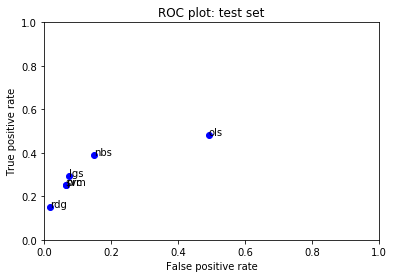

In [29]:
fits = [svm_performance, lgs_performance, nbs_performance, rdg_performance, prc_performance, ols_performance]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### looking at reviews based on their classification

Let's say we decide that Ridge Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [30]:
amazon.loc[0, "Text"]

'As much as I love Italian Sweet Creme in liquid form ( the only one I use ) , this one is not even closer to the taste of the liquid, I have strange after taste like chemical or something , plus I get flux-reflect if I use to often , very disappointed and will not purchase again .'

In [31]:
amazon.loc[0, "helpful"]

False

In [32]:
ridge_predictions = rdg.predict(X)

In [33]:
ridge_predictions.shape

(91000,)

In [34]:
print(ridge_predictions)

[False False False ... False False False]


In [25]:
# false positives

import random, time

for i in range(0, len(ridge_predictions)):
    if (ridge_predictions[i] == True):
        if (amazon.loc[i, "helpful"] == False):
            if (random.uniform(0, 1) < 0.05):
                print(i)
                print(time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(amazon.loc[i, "Time"])))
                print(amazon.loc[i, "Score"])
                print(amazon.loc[i, "HelpfulnessDenominator"])
                print(amazon.loc[i, "ProductId"])
                print(amazon.loc[i, "Text"])
                print('* * * * * * * * * ')

1645
2011-09-10 00:00:00
3
0
B000NW8AQ6
The flavor seems authentic and I liked the level of spice, BUT one serving is a whopping 510mg of salt and it tastes very very salty! If you had planned to eat the can as a meal we are talking about 2,040mg of salt. For me, the level of salt really detracted from the flavor and I hope they will consider lowering it.
* * * * * * * * * 
2107
2012-05-22 00:00:00
5
2
B003VMY3WU
Wonderful taste great texture good only for dieters to use 1/2cup less sodium and fat and less calories its great with chicken and veggies
* * * * * * * * * 
2472
2009-03-23 00:00:00
4
0
B001P05K7W
We first tried this product to help improve my pup's breath.....and it worked great.....but the side benefit was that my pup loves them and goes through a bag in a week....they're expensive in the stores...but buying them on-line has been a blessing....in fact I have to order more!!<br /><br />N Hopkins
* * * * * * * * * 
3975
2010-12-25 00:00:00
5
1
B001BCWAFY
My daughter has a Sai